In [1]:
%matplotlib inline 
import optoanalysis
from numpy import pi

In [2]:
optoanalysis.properties["default_fig_size"] = (7, 5) # sets default fig size for optoanalysis plots

In [3]:
data = optoanalysis.load_data("testData.raw")

Loading data from testData.raw


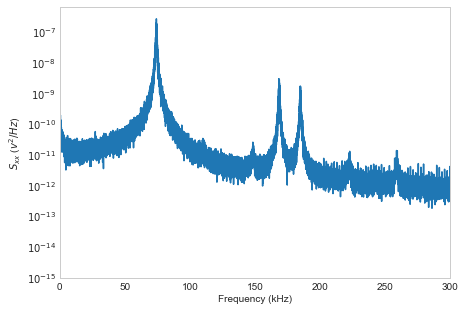

In [4]:
fig, ax = data.plot_PSD([0, 300]); # Plot PSD of loaded data

found best


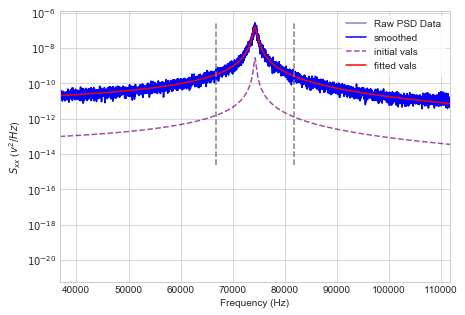



A: 548621211346.3998 +- 1.5185995850285559% 
Trap Frequency: 466605.4199560858 +- 0.014086349536225534% 
Big Gamma: 3992.3233665601933 +- 3.249713441212555% 


In [7]:
W_trap_z, A, Gamma, fig, ax = data.get_fit_auto(75e3); # fit to Z peak of loaded data and extracts the parameters A (The A parameter), W_trap_z (the trap frequency in Z) and Gamma (the damping on Z)

In [8]:
# next 3 lines are just me getting the pressure value from a file
with open("testDataPressure.dat", 'r') as file: 
    for line in file:
        pressure = float(line.split("mbar")[0])

R, M, ConvFactor = data.extract_parameters(pressure, 0.15) # extracts the radius of the particle, mass and conversion factor for the z degree of freedom (used to convert volts to meters of particle motion)

In [9]:
F_trap_z = W_trap_z/(2*pi)

In [10]:
print(F_trap_z)

74263+/-10


filtering data


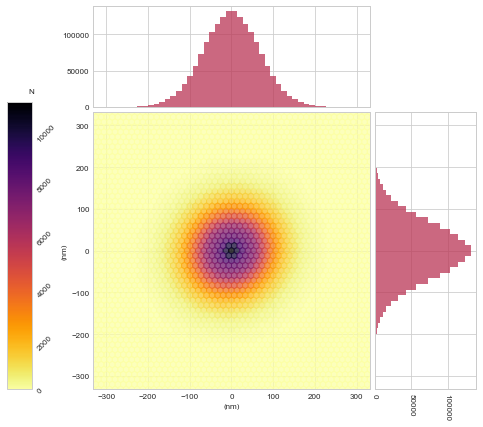

In [11]:
fig, axscatter, axhistx, axhisty, cbar = data.plot_phase_space(F_trap_z.n, ConvFactor, FractionOfSampleFreq=3, figsize=[7, 7]); # this filters for the z motion, calculates the phase space of this motion and plots it using the qplots library